# 1. 데이터 수집(Data collect)

Load train,test data using Pandas

In [23]:
import pandas as pd

train_data = pd.read_csv('input/train.csv')
test_data = pd.read_csv('input/test.csv')

# 2. 데이터 분석(Data analysis) 

여기서 NAN는 Not a Number의 약자이며, 이런 데이터들을 전처리(pre processing)하는 과정이 필요합니다.

In [24]:
train_data.head() #최상위 5개의 data를 보여준다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


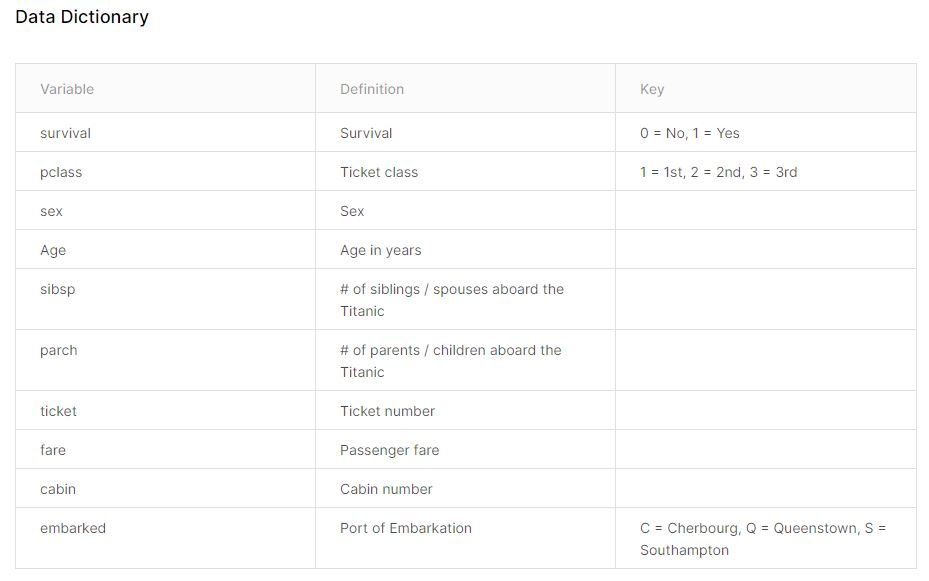

In [25]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train_data.shape # 891개의 승객정보와 12개의 특징정보가 있습니다.

(891, 12)

In [27]:
test_data.shape

(418, 11)

In [28]:
train_data.info() 
# 각 컬럼의 not-null인 정보들을 알 수 있고, 데이터 타입까지 알 수 있습니다.
# 밑에서 보면 Age, Cabin, Embarked  Column이 null인 데이터를 가지고 있다는 것을 알 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
test_data.info() # Age, Fare, Cabin에 각각 null인 데이터가 있음을 알 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


이런 null인 데이터는 feature engineering을 통해 null이 아닌 값을 줘서 머신러닝에 사용해야 합니다.

# Feature engineering 이란?

machine learning을 통해 신뢰할만한 결과를 얻기 위해서는 적절한 feature들을 선정하는 것.
필요한 feature이지만 없는 경우, 추가해야 합니다. 별로 도움이 안 될 feature는 없애 버려야 합니다. 
많은 feature 중에서 결과에 좋은 영향을 줄 feature만 선정해야 합니다.

In [30]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

위와같이 pandas를 이용하면 데이터를 쉽게 분석할 수 있습니다.

# 3. Visulaization using matplotlib or C

Bar Chart for categorical Features

1. Pclass
2. Sex
3. SibSp(# of siblings and spouse)
4. Parch(# of parents and children)
5. Embarked
6. Cabin

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn defalut for plots

함수에 관해 간단히 설명해보겠습니다.
함수 bar_chart의 파라미터로 특징(컬럼)을 하나씩 보내게 되는데,
만약 성별을 보내면 성별에 따라서 죽었는지 살았는지, 또 다른 특징을 보내면 그 특징에 따라 결과를 시각화 시켜주는 함수가 됩니다.

In [33]:
def barChart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

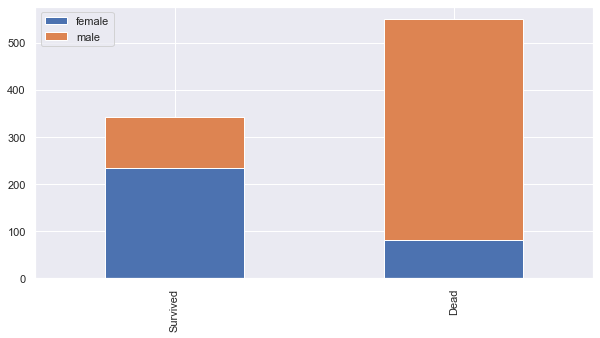

In [34]:
barChart('Sex')

위 차트에서 여자가 남자보다 살아날 확률이 높다는 가설을 세울 수 있습니다.

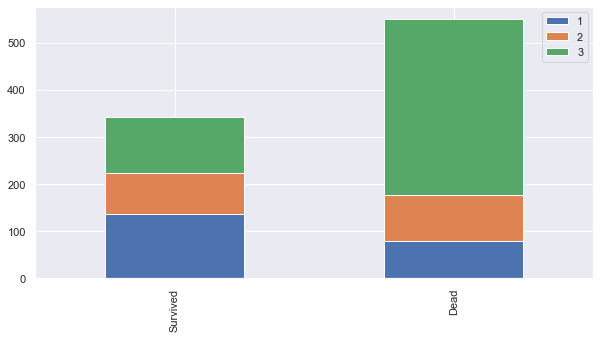

In [35]:
barChart('Pclass')

퍼스트 클래스 자리는 3rd 클래스 자리보다 살아날 확률이 높은 자리였습니다.!

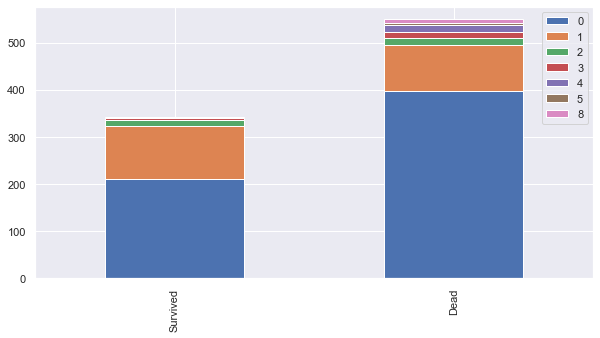

In [44]:
barChart('SibSp')

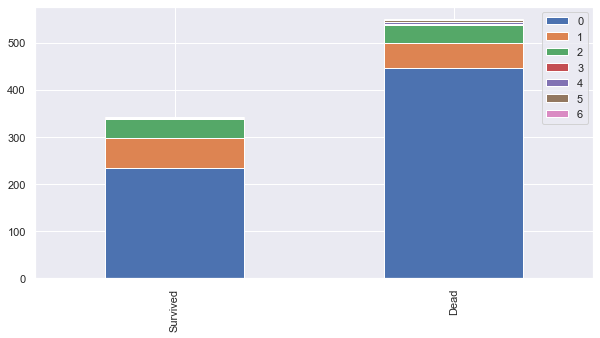

In [45]:
barChart('Parch')

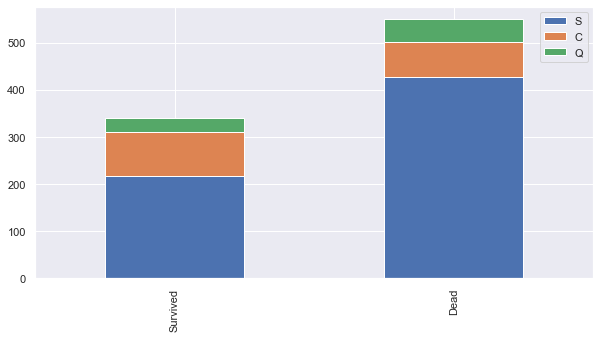

In [46]:
barChart('Embarked')

뭔가 다 비슷해서 가설을 세우기엔 부족한 데이터입니다.

In [47]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 4. Feature(컬럼) Engineering 시작

이 부분의 핵심은 아무래도 모델에 적합한 feature(컬럼) vectors를 만드는 거 같다.
feature vector는 numeric 으로 이루어진 n차 배열을 말하며 이는 기계를 직접적으로 학습시키는 데이터라 이 데이터를 어떻게 만드느냐에 따라 모델의 성능이 달라질 것이다.
텍스트 데이터들을 숫자로 변경시켜 주거나, null인 데이터에 대해 평균값으로 데이터를 채워주거나 하는 방식이다.

4-1.Name

In [ ]:
train_test = [train_data,test_data]  # train과 test데이터 셋을 합쳐준다.
# 그런다음 해당 데이터셋에 대하 변환작업을 한다던지 하면 두번 손 쓸 필요 없이 한번에 할 수 있다.
for data in train_test:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [50]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Mme           1
Jonkheer      1
Ms            1
Lady          1
Countess      1
Capt          1
Don           1
Name: Title, dtype: int64

In [51]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [52]:
Title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, 
                 "Major":3, "Mlle":3, "Countess":3,"Ms":3,"Lady":3,"Jonkheer":3,"Don":3,
                 "Dona":3,"Mme":3,"Capt":3,"Sir":3}
for data in train_test:
    data['Title'] = data['Title'].map(Title_mapping)

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [54]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,3


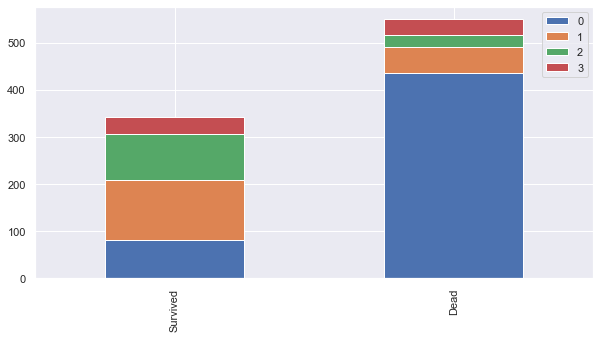

In [55]:
barChart('Title')

mapping한 결과로 그래프를 그리니 위와 같이 MR, 즉 남자인 사람이 휠씬 많이 죽은 것을 알 수 있다.
이제 Name에서는 필요한 정보를 모두 뺏으니 제거해 준다.

In [56]:
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)

In [57]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [80]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,1.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


4.3 sex
male:0, female:1

In [59]:
sex_map = {"male":0,"female":1}
for data in train_test:
    data['Sex'] = data['Sex'].map(sex_map)

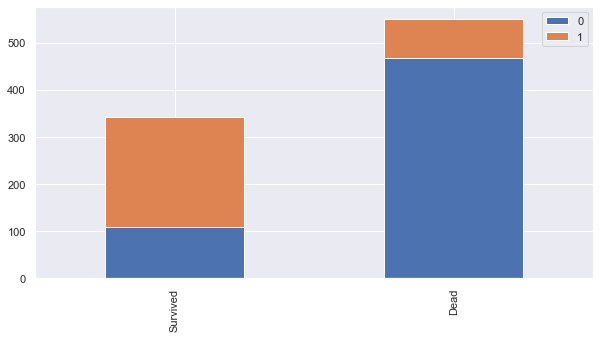

In [60]:
barChart('Sex')

여자가 남자보다 생존율이 높았다.

4.4 Age
이 나이정보는 빠진것들이 꽤 있기 때문에 채워넣는 작업을 해야한다.
여기서 어떻게 채워 넣을지가 매우 중요하다. 그 중 한가지 방법으로는 전체 나이의 평균값을 넣어주는 방법이 있다. 하지만 이렇게 넣어주기 보다는 뭔가 기준을 잡아서 넣어 주는것이 좋은 모델을 만드는 하나의 방법이다. 예를들어 성별을 기준 평균값, 혹은 이름,성별 기준 평균값 등이 있을 수 있다.

In [61]:
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"),inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"),inplace=True)

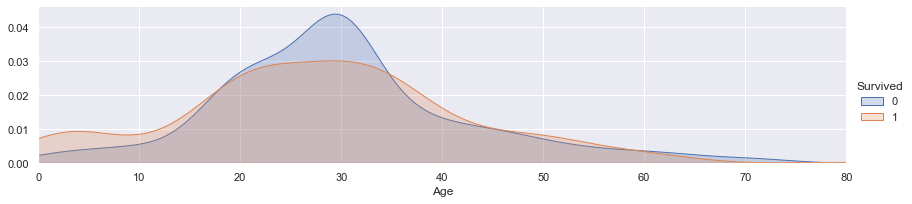

In [62]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_data["Age"].max()))
facet.add_legend()

plt.show()

(0.0, 15.0)

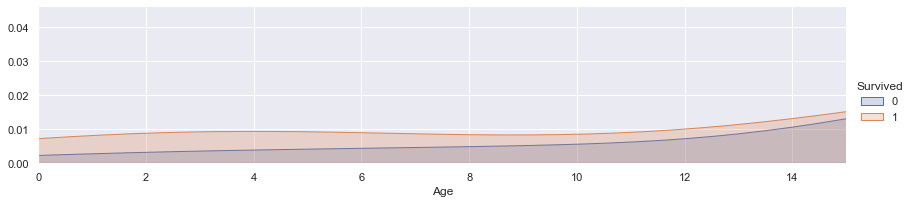

In [63]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_data["Age"].max()))
facet.add_legend()

plt.xlim(0,15)

(15.0, 30.0)

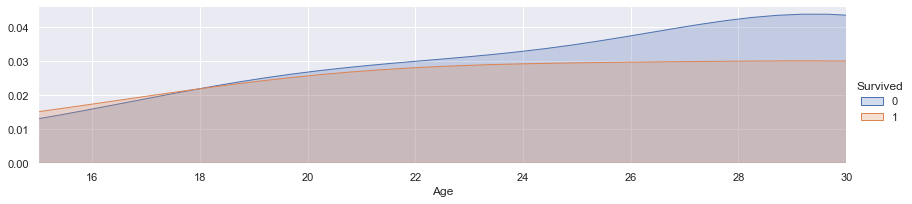

In [64]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_data["Age"].max()))
facet.add_legend()

plt.xlim(15,30)

(30.0, 45.0)

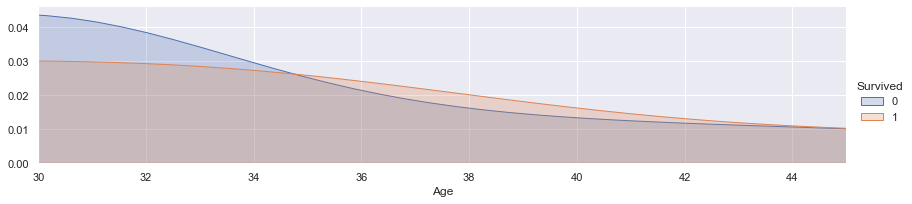

In [65]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_data["Age"].max()))
facet.add_legend()

plt.xlim(30,45)

(45.0, 60.0)

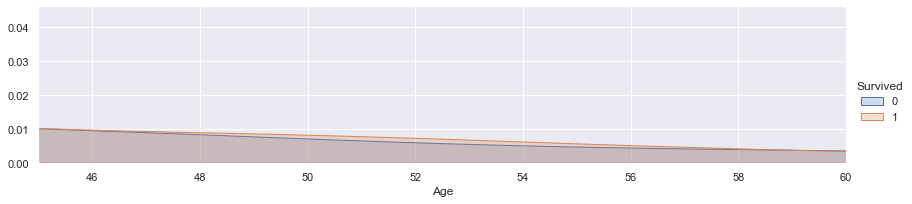

In [66]:
facet = sns.FacetGrid(train_data,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade=True)
facet.set(xlim=(0,train_data["Age"].max()))
facet.add_legend()

plt.xlim(45,60)

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


Age 컬럼의 NaN이 사라진 것을 할 수 있다.

4.4-2 Bining
Binning/Converting Numerical Age to Categorical Variable
나이와 같이 연속된 숫자의 데이터인 경우 범위별로 카테고리화 시킬 수 있다.
0: 0~15
1: 15~30
3: 30~45
4: 45~60

In [69]:
for data in train_test:
    data.loc[ data["Age"] <= 18, "Age"] = 0
    data.loc[(data["Age"] > 18) & (data["Age"] <= 35), "Age"] = 1
    data.loc[(data["Age"] > 35) & (data["Age"] <= 45), "Age"] = 2
    data.loc[ data["Age"] > 45 , "Age"] = 3

In [70]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0


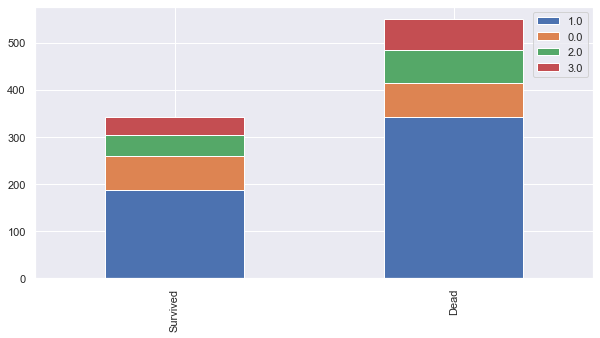

In [71]:
barChart("Age")

4.5 Embarked
filling missing values

<AxesSubplot:>

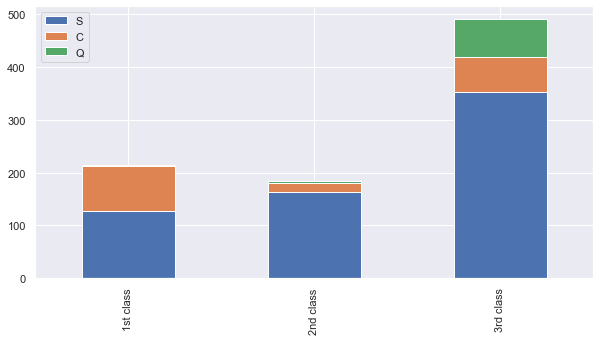

In [72]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Embarked가 S인 데이터가 50%이상이기 때문에 null인 값에는 S를 넣어도 무방하다.

In [73]:
for data in train_test:
    data['Embarked'] = data['Embarked'].fillna('S')

In [74]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for data in train_test:
    data['Embarked'] = data['Embarked'].map(embarked_mapping)

4.6 Fare
티켓가격은 각 1st,2nd,3rd 클래스의 평균값을 넣어주면 무난할 것이다.

In [81]:
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,1.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,1.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


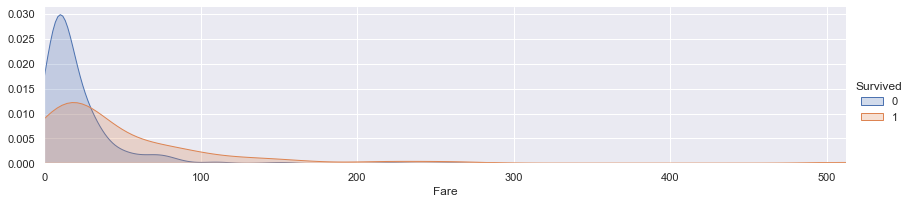

In [76]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
 
plt.show() # 가격에 따라 살고 죽고를 나타낸 그래프

(30.0, 80.0)

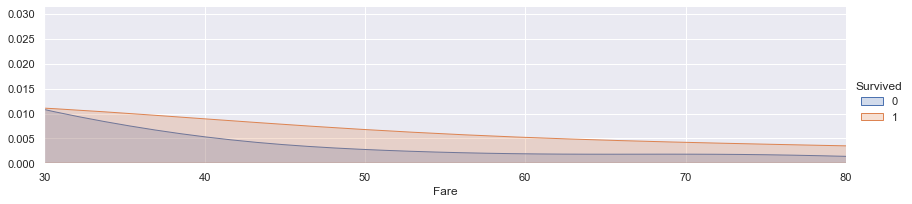

In [77]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(30, 80)

(0.0, 512.3292)

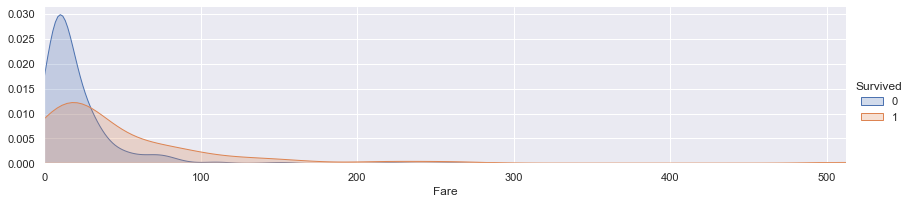

In [78]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train_data['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [83]:
for data in train_test:
    data.loc[ data['Fare'] <= 29, 'Fare'] = 0
    data.loc[(data['Fare'] > 29) & (data['Fare'] <= 50), 'Fare'] = 1
    data.loc[(data['Fare'] > 50) & (data['Fare'] <= 100), 'Fare'] = 2
    data.loc[ data['Fare'] > 100, 'Fare'] = 3

In [84]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0,0


4.7 Cabin

In [86]:
train_data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F33            3
              ..
C104           1
C7             1
A20            1
C47            1
E12            1
Name: Cabin, Length: 147, dtype: int64

In [87]:
for data in train_test:
    data['Cabin'] = data['Cabin'].str[:1]

<AxesSubplot:>

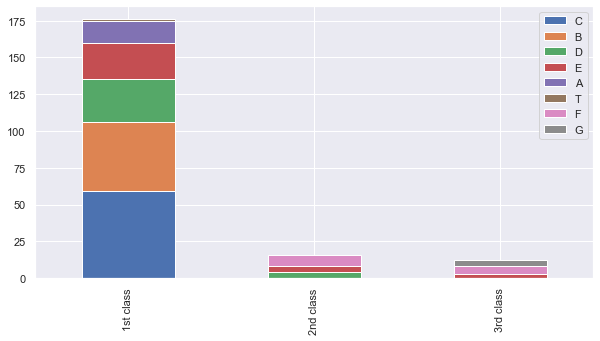

In [88]:
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [90]:
cabin_mapping = {"C": 0, "B": 0.4, "D": 0.8, "E": 1.2, "A": 1.6, "T": 2, "F": 2.4, "G": 2.8}
for data in train_test:
    data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [92]:
 # fill missing Fare with median fare for each Pclass
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

4.8 Faimly Size

In [93]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

(0.0, 11.0)

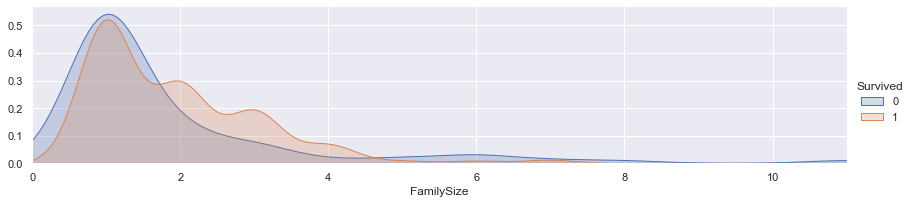

In [94]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [95]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in train_test:
    data['FamilySize'] = data['FamilySize'].map(family_mapping)

In [98]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.4,0,0,0.4
1,2,1,1,1,2.0,1,0,PC 17599,2.0,0.0,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.4,0,1,0.0
3,4,1,1,1,1.0,1,0,113803,2.0,0.0,0,2,0.4
4,5,0,3,0,1.0,0,0,373450,0.0,2.4,0,0,0.0


In [99]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop(['PassengerId'], axis=1)

In [100]:

train_temp = train_data.drop('Survived', axis=1)
target = train_data['Survived']

train_temp.shape, target.shape

((891, 8), (891,))

In [101]:
train_temp.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.4,0,0,0.4
1,1,1,2.0,2.0,0.0,1,2,0.4
2,3,1,1.0,0.0,2.4,0,1,0.0
3,1,1,1.0,2.0,0.0,0,2,0.4
4,3,0,1.0,0.0,2.4,0,0,0.0
5,3,0,1.0,0.0,2.4,2,0,0.0
6,1,0,3.0,2.0,1.2,0,0,0.0
7,3,0,0.0,0.0,2.4,0,3,1.6
8,3,1,1.0,0.0,2.4,0,2,0.8
9,2,1,0.0,1.0,1.8,1,2,0.4


# 5. Modelling

In [104]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# 6.2 Cross Validation (K-fold)

6.2.1 kNN

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [107]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_temp, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.80898876 0.80898876 0.83146067 0.83146067
 0.82022472 0.79775281 0.80898876 0.83146067]


In [108]:
# kNN Score
round(np.mean(score)*100, 2)

81.15

6.2.2 Decision Tree

In [114]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_temp, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.84269663 0.76404494 0.82022472 0.79775281 0.80898876
 0.86516854 0.7752809  0.74157303 0.80898876]


In [115]:
# decision tree Score
round(np.mean(score)*100, 2)

80.25

6.2.3 Ramdom Forest

In [116]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_temp, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.84269663 0.75280899 0.80898876 0.83146067 0.79775281
 0.84269663 0.78651685 0.7752809  0.84269663]


In [117]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.25

6.2.4 Naive Bayes

In [119]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_temp, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.74157303 0.71910112 0.76404494 0.80898876
 0.7752809  0.7752809  0.84269663 0.84269663]


In [120]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.56

6.2.5 SVM

In [122]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_temp, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.80898876 0.80898876 0.85393258 0.80898876
 0.83146067 0.84269663 0.84269663 0.84269663]


In [123]:
round(np.mean(score)*100,2)

82.72

In [126]:
clf = SVC()
clf.fit(train_temp, target)

test_temp = test_data.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_temp)

In [128]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [129]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
